In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
data = pd.read_csv('characterization_algae_bioplastic_samples.csv', encoding='latin1', delimiter=';')

In [3]:
print(data.columns)

Index(['Variation ID', 'Sample ID', 'Young Modulus [Mpa]',
       'Yield Strength [Mpa]', 'Elongation at Yield', 'UTS [Mpa]',
       'Elongation at break', '% Water ', '% Agar ', '%Gly ', 'Water [ml]',
       'Glycerin [ml]', 'Agar [gr]', 'L', 'A', 'B', 'C', 'EM', 'E', 'Area',
       'Inicial weight (Mixture + tray) [gr]', 'Sample tray [gr]',
       'Tº fabrication [ºC]', 'Fabrication time [Seg]', 'Mixture [ml]',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')


In [4]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Variation ID', 'Sample ID', 'Young Modulus [Mpa]',
       'Yield Strength [Mpa]', 'Elongation at Yield', 'UTS [Mpa]',
       'Elongation at break', '% Water', '% Agar', '%Gly', 'Water [ml]',
       'Glycerin [ml]', 'Agar [gr]', 'L', 'A', 'B', 'C', 'EM', 'E', 'Area',
       'Inicial weight (Mixture + tray) [gr]', 'Sample tray [gr]',
       'Tº fabrication [ºC]', 'Fabrication time [Seg]', 'Mixture [ml]',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')


In [5]:
X = data[['% Water', '% Agar', '%Gly']]
y = data[['UTS [Mpa]', 'Elongation at break']] 


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = rf_model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 17.09079447823815
R-Squared: 0.9208010208371851


<Figure size 1000x600 with 0 Axes>

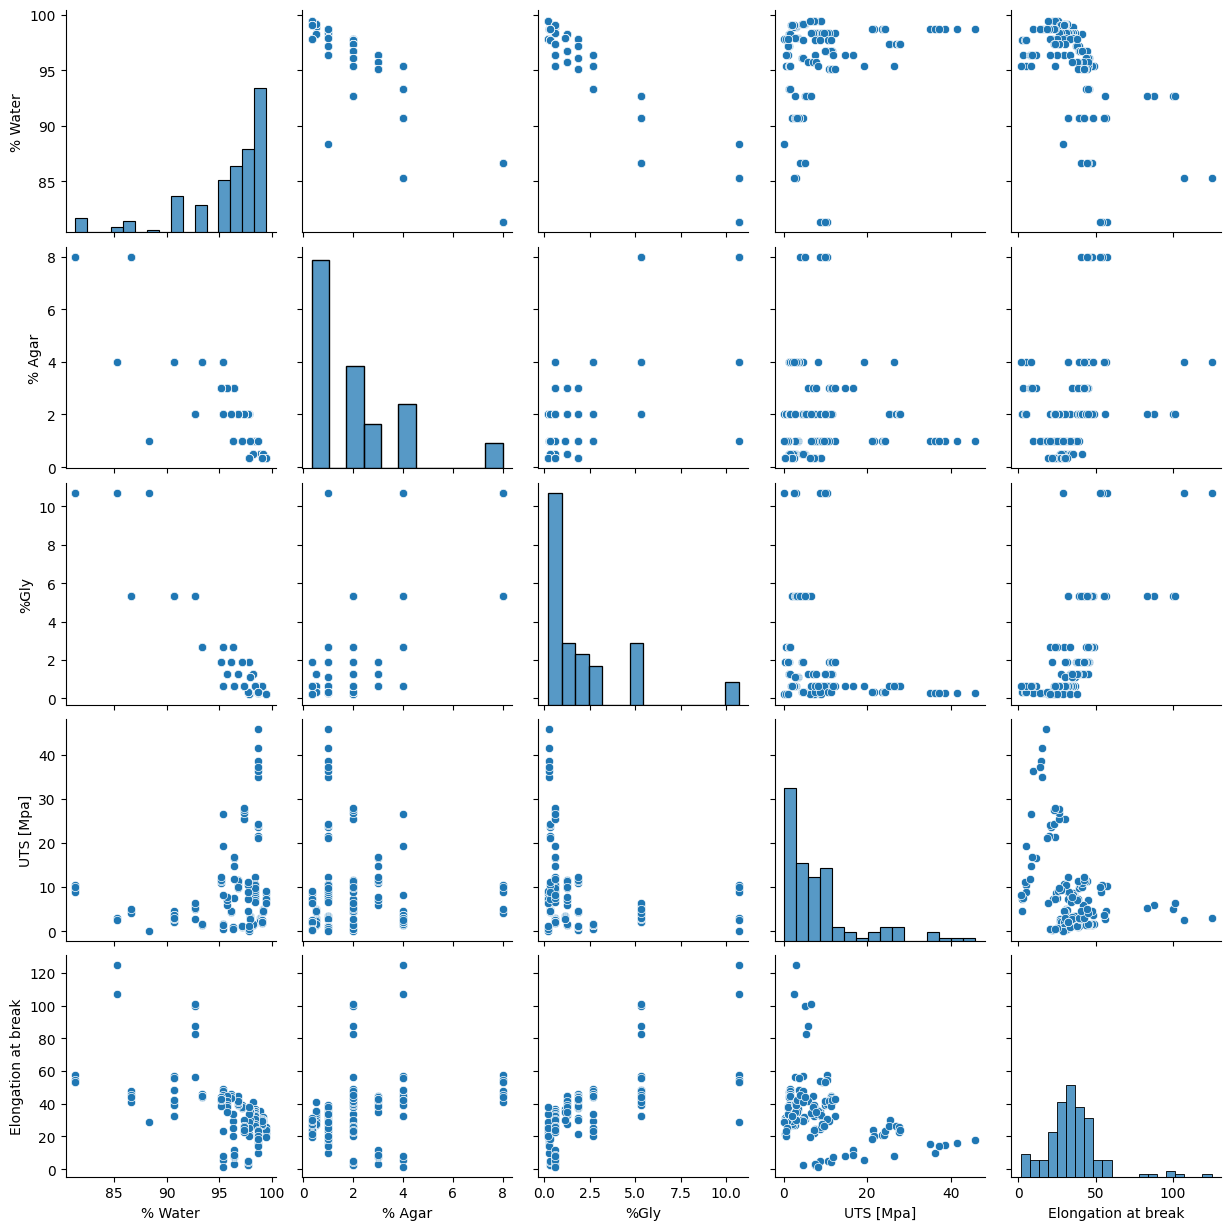

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.pairplot(data[['% Water', '% Agar', '%Gly', 'UTS [Mpa]', 'Elongation at break']])
plt.show()

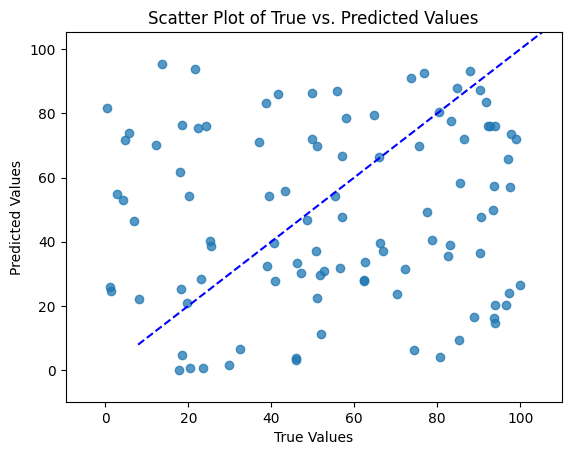

In [33]:
import numpy as np
# Example data (replace with your actual data)
UTS_REAL = np.random.rand(100) * 100
UTS_PRED = np.random.rand(100) * 100

plt.scatter(UTS_REAL, UTS_PRED, alpha=0.75)
maxim = max(UTS_REAL + UTS_PRED)
minim = min(UTS_REAL + UTS_PRED)
# Setting the limits
plt.xlim([min(UTS_REAL) - 10, max(UTS_REAL) + 10])
plt.ylim([min(UTS_PRED) - 10, max(UTS_PRED) + 10])
plt.plot([minim - 10,maxim + 10],[minim - 10,maxim + 10],c='blue',ls='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs. Predicted Values')

plt.show()


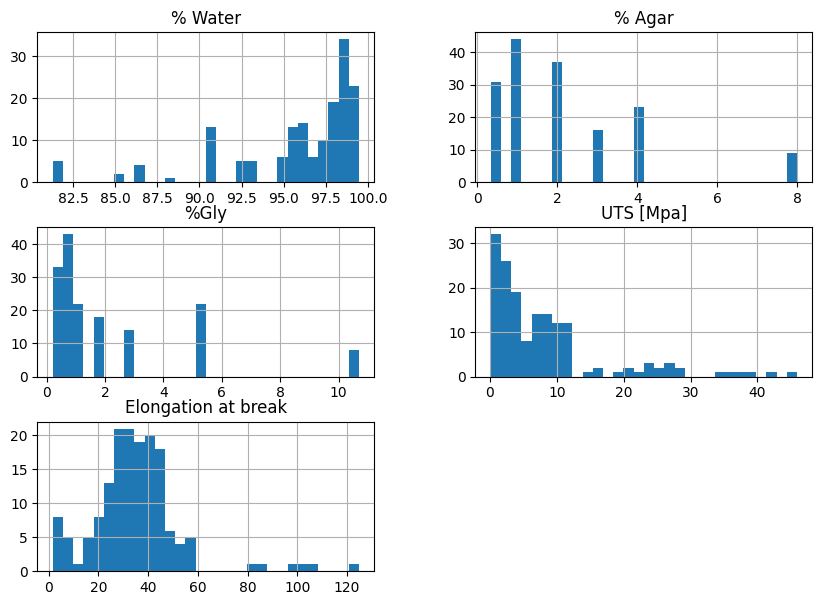

<Figure size 640x480 with 0 Axes>

In [36]:
data[['% Water', '% Agar', '%Gly', 'UTS [Mpa]', 'Elongation at break']].hist(bins=30, figsize=(10, 7))
plt.show()
plt.savefig('Young_3vs3.png')

In [38]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sorting features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


   Feature  Importance
0  % Water    0.505546
2     %Gly    0.331959
1   % Agar    0.162495


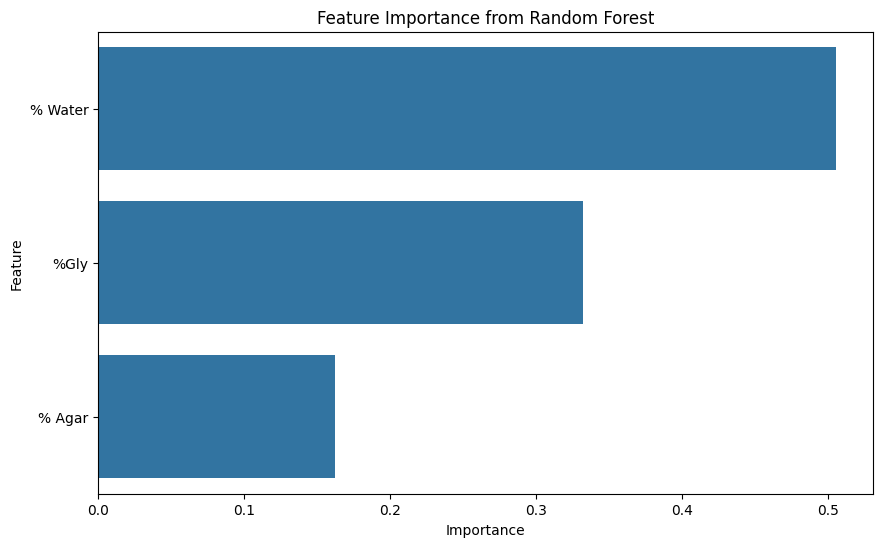

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()
